Import knihoven


In [1]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt
import math


Import souboru se jmeny 

In [2]:
#loads coco.names into list classNames 
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [3]:
model = YOLO('yolov8n.pt')#loads the model 

Pokud chci hledat urcity objekt zjisti jeho id

In [4]:
searched_object = 'teddy bear' #name of object I want to find
object_id = classNames.index(searched_object)# gets id of the object I want to find  
print(object_id)

77


nacte a zobrazy zvoleny obrazek

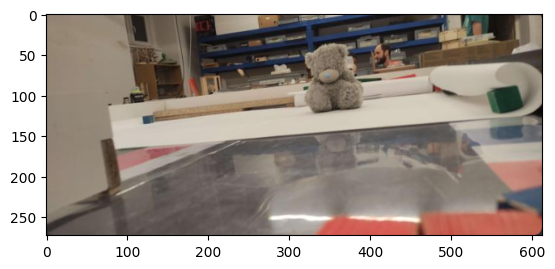

In [5]:
img = cv2.imread('test1.png')#loads the picture into variable 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#show the picture in rgb because cv2 use BGR color model  

zjisti velikost obrazku 

In [6]:
img_height,img_width,img_channels = img.shape# gets some info 
print('width',img_width,'Px')#width
print('height',img_height,'Px')#height 
print('channels',img_channels)#colour channels 

width 613 Px
height 273 Px
channels 3


pouziti modelu na nalezeni objektu

In [7]:
results = model(img)#applies model on the image 



0: 288x640 1 teddy bear, 119.9ms
Speed: 5.0ms preprocess, 119.9ms inference, 11.5ms postprocess per image at shape (1, 3, 288, 640)


vykresleni jednotlivych objektu na obrazek

In [8]:
objects_ids = []#list for ids of found objects 
objects_centers = []#list for objects centers 
objects_heights = []# list for objects height, used for calculating distance of the objects
distances = [] 
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#gets the object id 
            print(classNames[cls])#prints the object class 
            print(cls) #prints the object id 
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            if cls == 77:
                cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            if cls == 77:
                cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu
            if cls == 77:
                cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            objects_ids.append(cls)#zapisovani hodnot do listu
            objects_centers.append(center)#zapisovani hodnot do listu
            objects_heights.append(y2)
            distance = img_height-y1-y2
            print(distance)
            distances.append(distance)
cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,0),thickness=2 )#vykresli na video primku stredem videa

teddy bear
77
X= 316 Y= 35 W= 392 H= 121
center: 354 78
confidence: 88
117


array([[[ 86,  94, 100],
        [111, 129, 140],
        [112, 130, 141],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[110, 128, 139],
        [111, 129, 140],
        [112, 130, 141],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[110, 128, 140],
        [111, 129, 141],
        [112, 130, 142],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       ...,

       [[ 53,  48,  46],
        [ 54,  54,  56],
        [ 59,  64,  69],
        ...,
        [ 53,  48,  46],
        [ 53,  48,  46],
        [ 53,  48,  46]],

       [[ 53,  48,  46],
        [ 53,  48,  46],
        [ 59,  57,  58],
        ...,
        [ 53,  48,  46],
        [ 53,  48,  46],
        [ 53,  48,  46]],

       [[ 53,  48,  46],
        [ 53,  48,  46],
        [ 53,  48,  46],
        ...,
        [ 53,  48,  46],
        [ 53,  48,  46],
        [ 53,  48,  46]]

vypise id nalezenych objektu 

In [9]:
print(objects_ids)
print(objects_centers)
print(objects_heights)

[77]
[(354, 78)]
[121]


hledani urciteho objektu

In [10]:
a = objects_ids.index(77)#in list object_ids search for specific number and returns index of the number
print(a)#prints the index 
x,y=objects_centers[a]#in list finds values for given index
print(x,y)#prints the values 
center_line = int(img_width/2)# x coordinates of image center
object_deviation = center_line-x # deviation of object from center of the screen 
print('deviation = ',object_deviation) 
h = objects_heights[a] # for given index finds object height 
print(h)
#measuring distances 
d=distances[a] # for given index finds distance of the object in px 
cv2.line(img,(0,(img_height-d)),(img_width,(img_height-d)),(0,255,0),thickness=2) #draws a line where is the object 
print(d) # prints object distance in px
#calculator from px to cm 
#if distance in px is larger than 240 px use this equation
if d>240:
    distance_cm = 0.001894930772332081 * (d- 62.49315340028377 )**2+ 41.845975945942605
#if distance in px is smaller than 240 px use this equation
if d<240:
    distance_cm = np.exp( 3.486047002894599 )*np.exp(0.0045*d)
print('distance:',distance_cm,'cm')# prints the value in cm
#angle calculating 
angle = math.atan(object_deviation/d)
print(np.rad2deg(angle),'°')
#way lenght 
w = distance_cm/(math.cos(abs(angle)))
print('distance to target:',w,'cm')





0
354 78
deviation =  -48
121
117
distance: 55.287508829422954 cm
-22.30620505490764 °
distance to target: 59.759386269010236 cm


ukaze obrazek

tensor([[316.9645,  35.1339, 392.6997, 121.3108,   0.8848,  77.0000]])


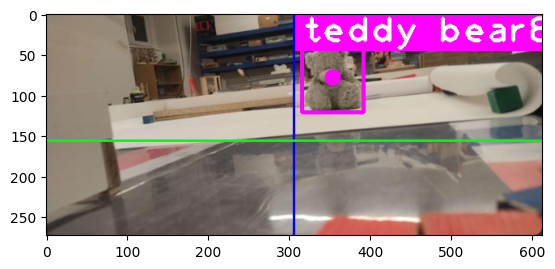

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# konvertuje bgr to rgb
print(boxes.data)
